Shreyansh Misra

# I. Dataset Creation

#### Importing Dependencies

In [1]:
import requests
import re
import numpy as np
from bs4 import BeautifulSoup as bs

#### S&P 500

The S&P500 is an index tracking the stock performance of the 500 largest public companies in the USA by market capitalization. This dataset was selected as companies within the S&P500 are well established and have large market capitalizations in a variety of industires, thereby making them low-risk equities for investment.

In [2]:
sp500_url = "https://thirsty-golick-fbd29a.netlify.app/table"

#### Scraping List of Stock Tickers

In [3]:
res = requests.get(sp500_url)
soup = bs(res.text, 'html.parser')

table = soup.findAll('table')[0].findAll('tbody')

In [4]:
SP500 = []

#
for i, ticker in enumerate(table[0]):
    if len(ticker) > 1:
        
        #
        text = re.sub(r"[<trd>]", "", str(ticker))
        text = text.split('/')
        
        SP500.append(text[4])
        
        
SP500[0], SP500[1], SP500[2]

('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"MSFT',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"AAPL',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"AMZN')

#### Cleaning Stock Tickers Dataset

In [5]:
# removing text styling prefix
SP500 = [value.removeprefix('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"') for value in SP500]

# removing element 99 "span"
SP500.pop(99)


print(SP500)

['MSFT', 'AAPL', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'FB', 'NVDA', 'BRK.B', 'JPM', 'JNJ', 'UNH', 'HD', 'V', 'PG', 'BAC', 'DIS', 'ADBE', 'MA', 'CRM', 'NFLX', 'XOM', 'PFE', 'PYPL', 'CMCSA', 'TMO', 'CSCO', 'ACN', 'PEP', 'AVGO', 'NKE', 'COST', 'CVX', 'KO', 'ABT', 'VZ', 'WMT', 'LLY', 'WFC', 'ABBV', 'INTC', 'MRK', 'MCD', 'DHR', 'QCOM', 'T', 'TXN', 'LIN', 'INTU', 'NEE', 'LOW', 'AMD', 'MDT', 'ORCL', 'HON', 'UNP', 'UPS', 'PM', 'MS', 'AMAT', 'SBUX', 'RTX', 'GS', 'NOW', 'BLK', 'C', 'BMY', 'ISRG', 'AMT', 'TGT', 'CVS', 'BA', 'SCHW', 'AMGN', 'GE', 'AXP', 'CAT', 'SPGI', 'IBM', 'PLD', 'BKNG', 'MMM', 'ANTM', 'ZTS', 'COP', 'DE', 'ADI', 'ADP', 'SYK', 'PNC', 'CHTR', 'LRCX', 'MDLZ', 'TJX', 'TFC', 'GM', 'CB', 'LMT', 'MO', 'GILD', 'MU', 'USB', 'MMC', 'EL', 'CSX', 'CME', 'DUK', 'CCI', 'SHW', 'ICE', 'F', 'EW', 'CI', 'TMUS', 'ADSK', 'FIS', 'EQIX', 'NSC', 'BDX', 'COF', 'APD', 'ETN', 'ITW', 'SO', 'CL', 'AON', 'REGN', 'KLAC', 'MCO', 'WM', 'D', 'DXCM', 'BSX', 'HCA', 'ILMN', 'FISV', 'FDX', 'NXPI', 'EMR', 'HUM', 'ECL', 

#### Scraping List of Stock Weights

In [6]:
weight500 = []

#
for i, ticker in enumerate(table[0]):
    if len(ticker) > 1:
        
        text = re.sub(r"[<trd>]", "", str(ticker))
        text = text.split('/')
        
        weight500.append(text[6])

weight500[0], weight500[1], weight500[2]

('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"6.33576',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"5.95990',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"3.84511')

#### Cleaning Stock Weights Dataset

In [7]:
# removing text styling prefix
weight500 = [value.removeprefix('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"') for value in weight500]

# removing element 99 "span"
weight500.pop(99)

'span'

#### Converting Weights from Percentages to Decimals

In [8]:
# converting weight500 elements from strings to floats
weight500 = list(np.float_(weight500))

# dividing all weights by 100
weight500[:] = [x / 100 for x in weight500]

# round all weights to four decimal places
weight500[:] = [round(num, 4) for num in weight500]

# weights cannot equal zero
if any(i == 0.0000 for i in weight500):
    print("Fail")
else:
    print("Pass")

print(weight500)

Pass
[0.0634, 0.0596, 0.0385, 0.0249, 0.0225, 0.0211, 0.0204, 0.0186, 0.0134, 0.0126, 0.0108, 0.0108, 0.0098, 0.0092, 0.0089, 0.0087, 0.008, 0.0079, 0.0076, 0.0075, 0.0072, 0.0069, 0.0068, 0.0067, 0.0062, 0.0061, 0.006, 0.0059, 0.0058, 0.0058, 0.0057, 0.0057, 0.0056, 0.0055, 0.0055, 0.0054, 0.0054, 0.0053, 0.0052, 0.0052, 0.0052, 0.0052, 0.0048, 0.0047, 0.0046, 0.0045, 0.0045, 0.0043, 0.0042, 0.0042, 0.0042, 0.0042, 0.0041, 0.0039, 0.0039, 0.0039, 0.0038, 0.0037, 0.0037, 0.0035, 0.0035, 0.0035, 0.0034, 0.0034, 0.0034, 0.0034, 0.0033, 0.0033, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031, 0.003, 0.003, 0.0029, 0.0028, 0.0028, 0.0028, 0.0027, 0.0027, 0.0026, 0.0026, 0.0026, 0.0025, 0.0025, 0.0025, 0.0024, 0.0023, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.002, 0.002, 0.002, 0.002, 0.002, 0.0019, 0.0019, 0.0019, 0.0019, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0016, 0.0

#### Checking Lengths of Datasets

Weights will correspond to a stock ticker of the same index. Ensuring that the two lists have the same length ensures that there aren't any missing elements and that the weights correspond to the right ticker. We observe that the S&P500 does not have exactly 500 tickers. This is because some companies have multiple classes of shares with large market capitalizations. For example, Alphabet (holding company of Google) lists both `GOOG` and `GOOGL`.

In [9]:
numTickers = len(SP500)
numWeights = len(weight500)

(numTickers, numWeights)

(504, 504)

# II. Screening Stocks

#### Importing Dependencies

In [10]:
import time
import os
import pandas as pd
import pickle as pkl

#### Ameritrade API

Ameritrade's API provides free stock data for almost all publicly traded stocks in the United States. As API keys are confidential, my Ameritrade API key was stored within a `keys.py` file. 

In [11]:
from keys import ameritrade
url = 'https://api.tdameritrade.com/v1/instruments'

In [12]:
def getMetrics(tickers):
    
    # ameritrade has limits on how many requests at a time
    start = 0
    end = 500
    
    while start < len(tickers):
        tickers = tickers[start:end]
    
        # api
        payload = {'apikey':ameritrade,
                   'symbol': tickers,
                   'projection':'fundamental'}

        results = requests.get(url,params=payload)
        data = results.json()

        # file
        name = 'temp' + '.pkL'

        files = []
        files.append(name)

        with open(name, 'wb') as file:
                pkl.dump(data, file)
            
        start = end
        end += 500

        time.sleep(1)
    
    
    #
    StockData = []

    for file in files:
        with open(file, 'rb') as f:
            info = pkl.load(f)

        tickers = list(info)
        metrics = ['symbol', 'peRatio', 'pegRatio', 'returnOnEquity', 'returnOnEquity']

        for ticker in tickers:
            row = []

            for metric in metrics:
                row.append(info[ticker]['fundamental'][metric])

            StockData.append(row)

        os.remove(file)
    
    # dataframe
    Titles = ['Ticker', 'Price to Earnings Ratio', 'Price to Earnings Growth', 'Return on Equity', 'Earnings Per Share Growth']
    df = pd.DataFrame(StockData, columns=Titles)

    return df        

#### Stock Metrics Dataframe

Notice that there are 493 stocks listed in the dataframe, rather than the 504 stocks listed in the list `SP500`. This indicates that we were not able to find information for 11 stocks.

In [13]:
metrics500 = getMetrics(tickers=SP500)
metrics500

,Ticker,Price to Earnings Ratio,Price to Earnings Growth,Return on Equity,Earnings Per Share Growth
0,TER,21.16302,0.000000,34.92339,34.92339
1,IPG,12.08989,0.386043,30.36495,30.36495
2,LVS,0.00000,0.000000,0.00000,0.00000
3,WYNN,0.00000,0.000000,0.00000,0.00000
4,TFC,11.60927,0.758927,10.03857,10.03857
...,...,...,...,...,...
488,GRMN,18.80439,0.000000,17.72269,17.72269
489,CCL,0.00000,0.000000,0.00000,0.00000
490,FIS,73.77180,0.085347,1.78297,1.78297
491,BAX,30.74888,0.000000,11.65216,11.65216


#### Screening Stocks

The proccess of screening stocks varies from person to person. There are a large number of factor models, stock metrics, and alternative data sources that can be taken into account whilst screening stocks. This project considered each stock's `Price to Earnings Ratio`, `Growth in Price to Earnings Ratio`, `Return of Equity`, and `Earnings per Share Growth`. 

In [14]:
screen = metrics500[
    
    # P/E over 30
    (metrics500['Price to Earnings Ratio'] > 30)
    
    # P/E Growth over 0.4 but less than 1.0
    & (metrics500['Price to Earnings Growth'] < 1 & (metrics500['Price to Earnings Growth'] > 0.4) 
     
    # RoE
    & (metrics500['Return on Equity'] > 20) 
     
    # epsGrowth  
     & (metrics500['Earnings Per Share Growth'] > 40))
]

screen

,Ticker,Price to Earnings Ratio,Price to Earnings Growth,Return on Equity,Earnings Per Share Growth
54,V,32.92148,0.910284,42.42532,42.42532
61,NVDA,49.20008,0.641749,41.95237,41.95237
173,IT,35.44394,0.970420,382.39060,382.39060
240,MA,36.00521,0.971600,153.79370,153.79370
324,VRSK,31.41290,0.563459,41.01540,41.01540


###### List of Top Stocks and Corresponding Weights

In [15]:
portfolio = screen.Ticker.values.tolist()

hold = []

for top in portfolio:
    index = SP500.index(top)
    weight = weight500[index]
    
    hold.append([index, top ,weight])


top5 = pd.DataFrame(hold)
top5.columns =['Index', 'Ticker', 'Weight']

top5, portfolio

(   Index Ticker  Weight
 0     13      V  0.0092
 1      7   NVDA  0.0186
 2    285     IT  0.0007
 3     18     MA  0.0076
 4    235   VRSK  0.0009,
 ['V', 'NVDA', 'IT', 'MA', 'VRSK'])

#### Adjusting Stock Weights

The weight in `weight500`are these stock's weights with respect to the S&P500. The sum of stock weights needs to equal 100% and therefore, the formula below was used. 

$$Adjusted \; Weight = \frac{Weight}{\sum Weights} \times 100 $$ 

In [16]:
sumWeights = top5.Weight.values.tolist()
sum(sumWeights)

0.037

In [17]:
hold = []

for top in portfolio:
    index = SP500.index(top)
    adjWeight = (weight500[index] / 0.037) * 100 
    
    hold.append([index, top , adjWeight])


top5 = pd.DataFrame(hold)
top5.columns =['Index', 'Ticker', 'AdjustedWeight']

top5

,Index,Ticker,AdjustedWeight
0,13,V,24.864865
1,7,NVDA,50.270270
2,285,IT,1.891892
3,18,MA,20.540541
4,235,VRSK,2.432432


In [18]:
adjWeights = top5.AdjustedWeight.values.tolist()
weight500[:] = [round(num, 4) for num in weight500]

sum(adjWeights)

99.99999999999999

# III. Portfolio Optimization (Data Collection)

#### Importing Dependencies

In [19]:
import datetime as dt
from pandas_datareader import data as web
import matplotlib.pyplot as plt

#### Portfolio Tickers and Initial Weights

In [20]:
EqualWeights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

adjWeights = list(np.float_(adjWeights))
adjWeights[:] = [x / 100 for x in adjWeights]
adjWeights = np.array(adjWeights)

portfolio, adjWeights, EqualWeights

(['V', 'NVDA', 'IT', 'MA', 'VRSK'],
 array([0.24864865, 0.5027027 , 0.01891892, 0.20540541, 0.02432432]),
 array([0.2, 0.2, 0.2, 0.2, 0.2]))

#### Historical Pricing Data

In [21]:
startDate = '2015-01-01'
todayDate = dt.datetime.today().strftime('%Y-%m-%d')

todayDate

'2022-08-18'

#### Stock Close Prices

A stock's closing price is the last price anyone paid for a share of that stock during the business hours of the exchange where the stock is listed. It's often used by investors to compare a stock's day-to-day performance (they are typically used in the line graphs depicting a stock's performance). The adjusted closing price of a stock factors in anything that could affect the stock's price after the market closes. 

In [22]:
adjClose = web.get_data_yahoo(portfolio, start=startDate, end=todayDate)
adjClose = adjClose['Adj Close']

adjClose.head()

Symbols,V,NVDA,IT,MA,VRSK
Date,,,,,
2015-01-02,62.883408,4.837623,83.599998,81.657913,62.517605
2015-01-05,61.495354,4.755915,82.099998,79.361031,61.706451
2015-01-06,61.099083,4.611724,81.349998,79.189453,61.491444
2015-01-07,61.917698,4.599708,82.599998,80.421310,61.530548
2015-01-08,62.748173,4.772738,83.430000,81.672203,62.146240


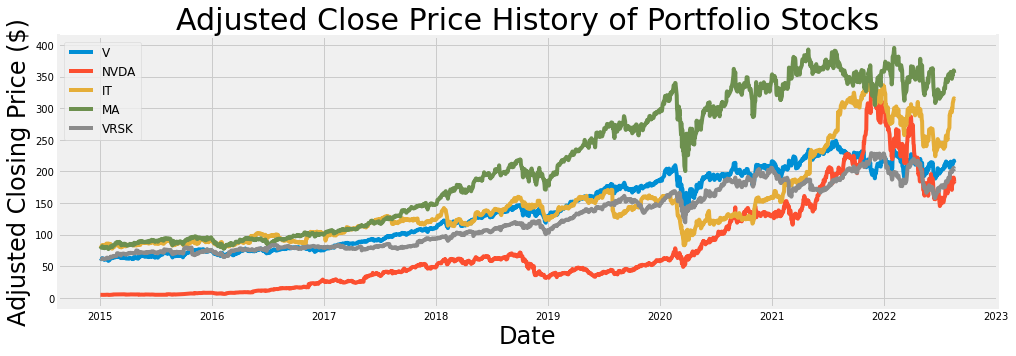

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 5))

stocks = adjClose

for x in stocks.columns.values:
  plt.plot(stocks[x],label=x)

title = 'Adjusted Close Price History of Portfolio Stocks'

plt.title(title, fontsize=30)
plt.xlabel('Date',fontsize=24)
plt.ylabel('Adjusted Closing Price ($)',fontsize=24)
plt.legend(stocks.columns.values,loc='upper left', fontsize=12)
plt.show()

#### Logarithmic Returns

xxx

In [24]:
logReturns = np.log(adjClose/adjClose.shift(1))
logReturns.head()

Symbols,V,NVDA,IT,MA,VRSK
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.022321,-0.017034,-0.018106,-0.028531,-0.013060
2015-01-06,-0.006465,-0.030787,-0.009177,-0.002164,-0.003490
2015-01-07,0.013309,-0.002609,0.015249,0.015436,0.000636
2015-01-08,0.013323,0.036927,0.009998,0.015435,0.009957


#### Mean Returns

In [25]:
meanReturns = logReturns.mean()
meanReturns

Symbols
V       0.000637
NVDA    0.001896
IT      0.000689
MA      0.000765
VRSK    0.000616
dtype: float64

#### Covariance Matrix

Covariance is a measure of the relationship between two or more variables. In finance, it is used to measure the relationship between two assets' returns. In practice, if there is a positive covariance, so the two stocks tend to move together. When one stock has a positive return, the other tends to have a positive return as well.

In [26]:
covMatrix = logReturns.cov()
covMatrix

Symbols,V,NVDA,IT,MA,VRSK
Symbols,,,,,
V,0.000269,0.000251,0.000166,0.000266,0.000140
NVDA,0.000251,0.000882,0.000223,0.000282,0.000187
IT,0.000166,0.000223,0.000360,0.000183,0.000136
MA,0.000266,0.000282,0.000183,0.000324,0.000148
VRSK,0.000140,0.000187,0.000136,0.000148,0.000218


# IV. Portfolio Optimization (Functions and Efficient Frontier)

#### Importing Dependencies

In [27]:
from scipy.optimize import minimize

#### Generating Random Portfolios

In [28]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(adjClose.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (logReturns.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(logReturns.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

#### Max Shapre Ratio from Random Portfolios

In [29]:
print('Max SR: {}'.format(sharpe_arr.max()))
print('Location: {}'.format(sharpe_arr.argmax()))

Max SR: 1.0489878721305903
Location: 4304


#### title

In [30]:
print(all_weights[1648,:])

maxSR_return = ret_arr[sharpe_arr.argmax()]
maxSR_vol = vol_arr[sharpe_arr.argmax()]

[0.32929617 0.31407276 0.01132636 0.19092092 0.15438379]


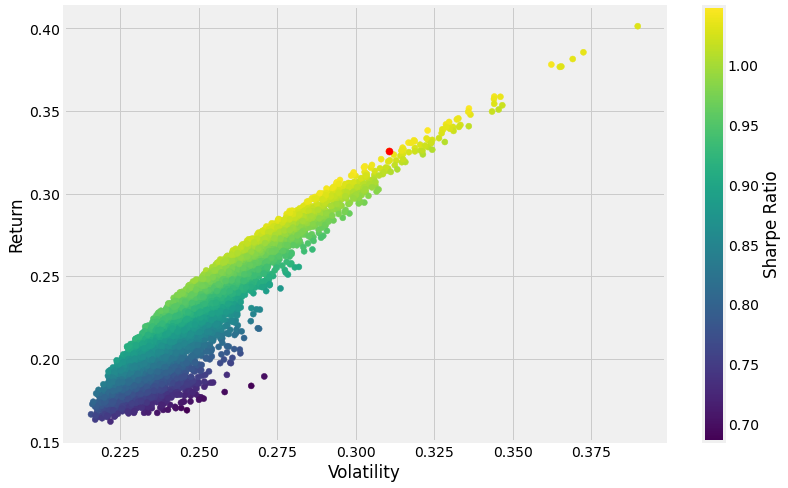

In [31]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(maxSR_vol, maxSR_return,c='red', s=50) # red dot
plt.show()

#### title

In [32]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(logReturns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(logReturns.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

#### title

In [33]:
cons = ({'type':'eq', 'fun':check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = [0.2, 0.2, 0.2, 0.2, 0.2]

In [34]:
opt_results = minimize(neg_sharpe, init_guess,method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results)

     fun: -1.0502346881303832
     jac: array([ 3.85493189e-02, -5.71906567e-05, -2.10106373e-06,  2.66775489e-04,
        6.60419464e-05])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.        , 0.55391575, 0.10798712, 0.04779605, 0.29030109])


In [35]:
get_ret_vol_sr(opt_results.x)

array([0.33766117, 0.32151021, 1.05023469])

In [36]:
frontier_y = np.linspace(0.15,0.40,200)

In [37]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [38]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

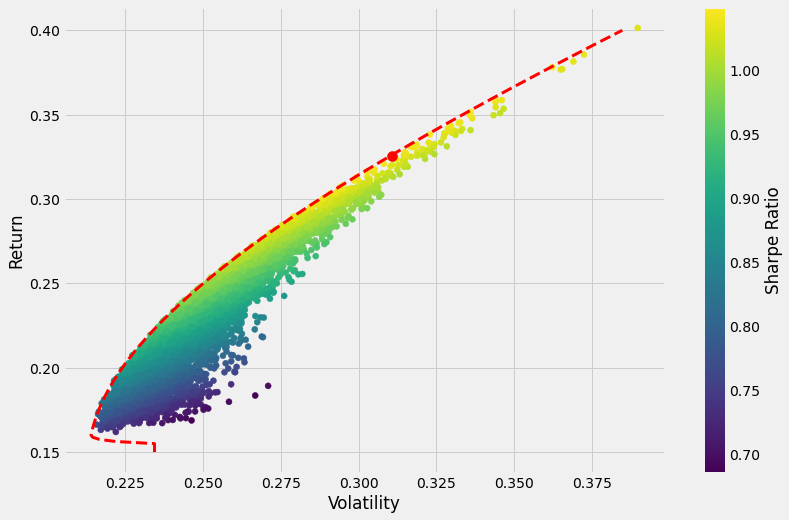

In [39]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(maxSR_vol, maxSR_return,c='red', s=100) # red dot
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.show()